<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/Clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/heart_dataset_mini.csv')

In [ ]:
df.shape

(304, 3)

In [ ]:
df.head()

,Patient id,age,chol
0,1,63.0,233.0
1,2,37.0,250.0
2,3,41.0,204.0
3,4,56.0,236.0
4,5,57.0,354.0


In [ ]:
df = df.drop_duplicates('Patient id')

In [ ]:
df.isnull().sum()

,0
Patient id,0
age,1
chol,1


In [ ]:
for i in ['age', 'chol']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
import numpy as np

In [ ]:
for i in df.select_dtypes(include=np.number).columns[:-1]:
  df[i].fillna(df[i].mean(), inplace = True)

<ipython-input-9-3645eb6eae04>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace = True)


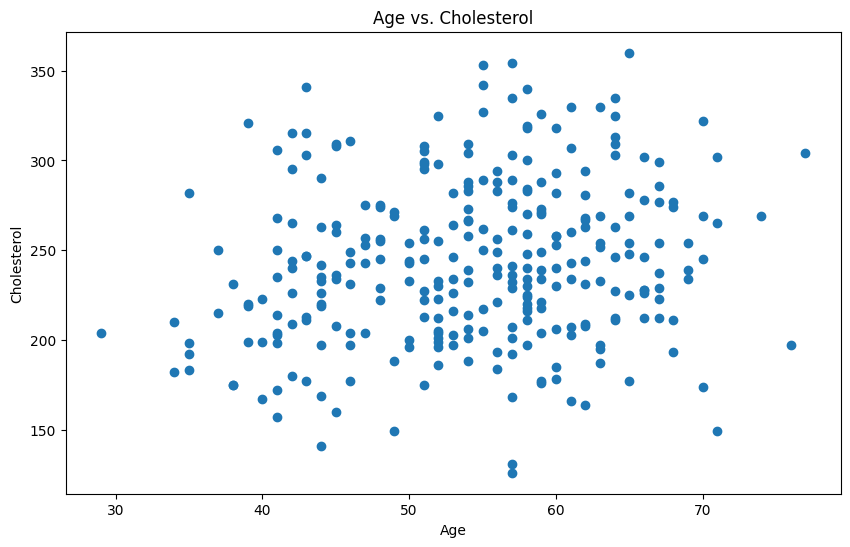

In [ ]:
# prompt: scatter plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in ['age', 'chol']:
    df[i] = scaler.fit_transform(df[[i]])


In [ ]:
df

,Patient id,age,chol
0,1,0.960479,-0.224699
1,2,-1.891852,0.151027
2,3,-1.453032,-0.865644
3,4,0.192543,-0.158394
4,5,0.302248,2.449588
...,...,...,...
299,299,0.302248,-0.047887
300,300,-1.014212,0.460449
301,301,1.509004,-1.108761
302,302,0.302248,-2.479057


**KMEANS CLUSTERING**

In [ ]:
X = df[['age', 'chol']]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#KMeans Clustering
model=KMeans(n_clusters=3)
#model fit
model=model.fit(X)
K_labels=model.labels_
k_centroid=model.cluster_centers_

#silhoutte
print(f"Number of Cluster: {3}, silhoutte_score : {silhouette_score(X,K_labels)}")


Number of Cluster: 3, silhoutte_score : 0.3627297966496706


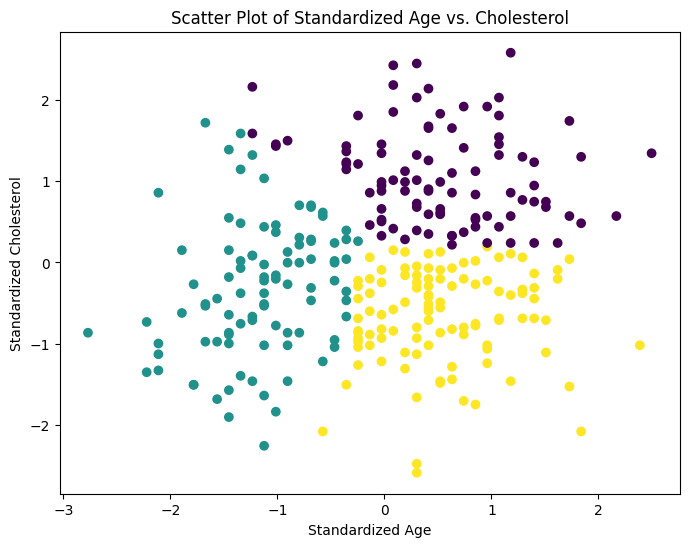

In [ ]:
# prompt: plot scatter for x

plt.figure(figsize=(8, 6))
plt.scatter(X['age'], X['chol'], c=K_labels, cmap='viridis') # use K_labels here
plt.title('Scatter Plot of Standardized Age vs. Cholesterol')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Cholesterol')
plt.show()


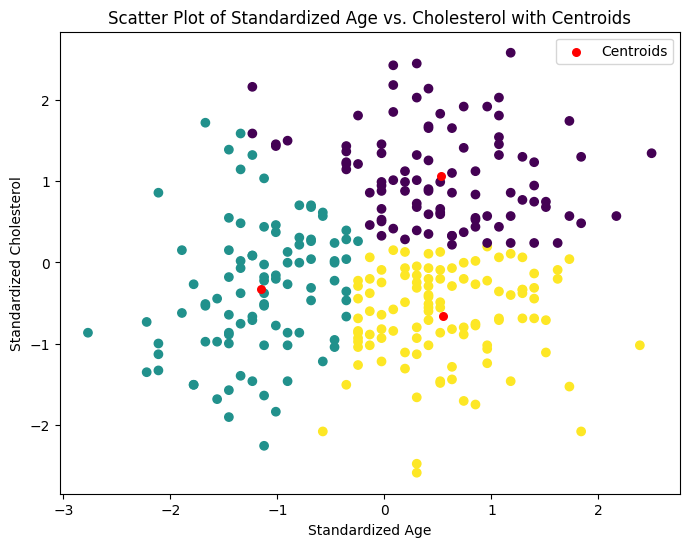

In [ ]:
# prompt: plot for centroid

plt.figure(figsize=(8, 6))
plt.scatter(X['age'], X['chol'], c=K_labels, cmap='viridis')
plt.scatter(k_centroid[:, 0], k_centroid[:, 1], s=30, c='red', label='Centroids') #Plot the centroids
plt.title('Scatter Plot of Standardized Age vs. Cholesterol with Centroids')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Cholesterol')
plt.legend()
plt.show()


In [ ]:
df['cluster_labels'] = K_labels

In [ ]:
df


,Patient id,age,chol,cluster_labels
0,1,0.960479,-0.224699,2
1,2,-1.891852,0.151027,1
2,3,-1.453032,-0.865644,1
3,4,0.192543,-0.158394,2
4,5,0.302248,2.449588,0
...,...,...,...,...
299,299,0.302248,-0.047887,2
300,300,-1.014212,0.460449,1
301,301,1.509004,-1.108761,2
302,302,0.302248,-2.479057,2


In [ ]:
cluster_stats = df.groupby('cluster_labels').agg({'age':'mean', 'chol': 'mean'})
cluster_stats

,age,chol
cluster_labels,,
0,0.530995,1.070123
1,-1.153093,-0.322275
2,0.551672,-0.663186


In [ ]:
# prompt: how to classify new datapoints

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Assuming 'model' is already defined from your previous code, but re-fit it to the selected features:
model = KMeans(n_clusters=3)
model = model.fit(df[['age', 'chol']])  # Re-fit to 'age' and 'chol' only

# Create separate scalers for 'age' and 'chol'
scaler_age = StandardScaler()
scaler_chol = StandardScaler()

# Fit the scalers to the corresponding columns
scaler_age.fit(df[['age']])
scaler_chol.fit(df[['chol']])


def classify_new_datapoint(new_datapoint):
    # new_datapoint should be a list or numpy array with the same features used for training
    # in this case it should contain 'age' and 'chol'
    if not isinstance(new_datapoint, (list, np.ndarray)):
        raise TypeError("new_datapoint must be a list or a numpy array.")

    if len(new_datapoint) != 2:
        raise ValueError("new_datapoint must have two values (age and chol).")

    # 1. Scale the new datapoint using the same scaler used for training.
    # Scale 'age' and 'chol' separately
    scaled_age = scaler_age.transform([[new_datapoint[0]]])[0][0]  # Extract scaled value
    scaled_chol = scaler_chol.transform([[new_datapoint[1]]])[0][0] # Extract scaled value

    scaled_datapoint = [scaled_age, scaled_chol]  # Combine scaled values

    # 2. Predict the cluster using the trained kmeans model.
    predicted_cluster = model.predict([scaled_datapoint])[0] # Pass as a list

    return predicted_cluster

# Example usage:
new_patient_age = 45  # Example new patient's age
new_patient_chol = 200 # Example new patient's chol
new_datapoint = [new_patient_age, new_patient_chol]

predicted_cluster = classify_new_datapoint(new_datapoint)
print(f"The new datapoint belongs to cluster: {predicted_cluster}")

The new datapoint belongs to cluster: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


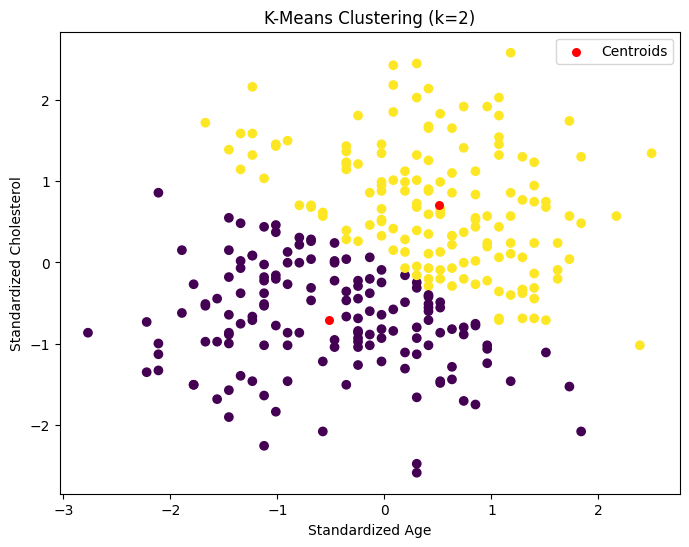

Number of Cluster: 2, silhoutte_score : 0.3418121154587755


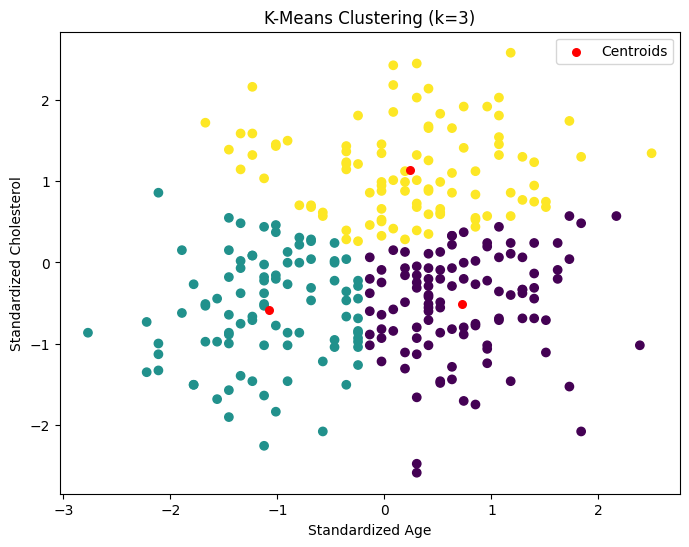

Number of Cluster: 3, silhoutte_score : 0.362290974242002


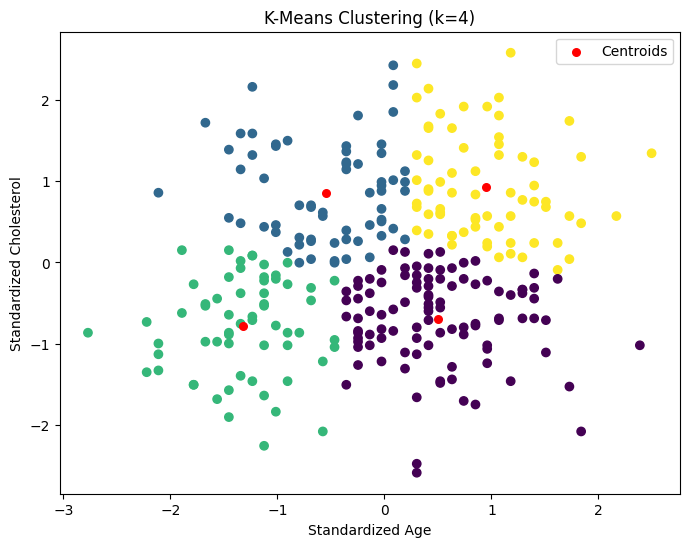

Number of Cluster: 4, silhoutte_score : 0.34960819037402874


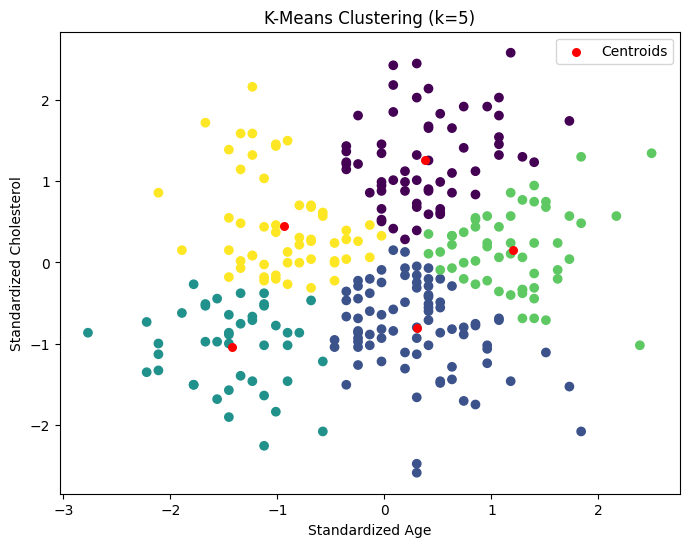

Number of Cluster: 5, silhoutte_score : 0.3416179496485185


In [ ]:
# prompt: clustering  plot for above code for each k

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ... (Your existing code)

# Function to plot clustering results for different values of k
def plot_clusters(k_values):
    for k in k_values:
        model = KMeans(n_clusters=k)
        model = model.fit(X)
        labels = model.labels_
        centroids = model.cluster_centers_

        plt.figure(figsize=(8, 6))
        plt.scatter(X['age'], X['chol'], c=labels, cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], s=30, c='red', label='Centroids')
        plt.title(f'K-Means Clustering (k={k})')
        plt.xlabel('Standardized Age')
        plt.ylabel('Standardized Cholesterol')
        plt.legend()
        plt.show()

        print(f"Number of Cluster: {k}, silhoutte_score : {silhouette_score(X, labels)}")

# Example usage (replace with your desired k values):
k_values_to_plot = [2, 3, 4, 5]
plot_clusters(k_values_to_plot)


In [ ]:
scaler = StandardScaler()  # Create an instance

In [ ]:
# prompt: import joblib

import joblib

# Assuming 'model', 'scaler_age', and 'scaler_chol' are defined in your previous code
# Save the trained model and scalers
joblib.dump(model, 'kmeans_model.pkl')
joblib.dump(scaler_age, 'scaler_age.pkl')
joblib.dump(scaler_chol, 'scaler_chol.pkl')


['scaler_chol.pkl']